# Digits clustern

## Import Bibliotheken

In [3]:
# Import Bibliotheken
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import random
from sklearn.mixture import GaussianMixture
import seaborn as sns; sns.set()  # for plot styling

In [4]:
# Einlesen der Daten in die Variable "data"
raw_data = pd.read_csv("../data/zip.train", header=None, sep=" ")

# Ausgabe der Länge von data (Zeilen) 
print(len(raw_data),'Datensätze(Zeilen) importiert ')

7291 Datensätze(Zeilen) importiert 


In [5]:
# Abschneiden der letzten Spalte
data = raw_data.iloc[:,:-1]
print("Shape data: ", data.shape)

Shape data:  (7291, 257)


In [6]:
#Darstellung der ersten Zeile von data:
data.iloc[0]

0      6.000
1     -1.000
2     -1.000
3     -1.000
4     -1.000
5     -1.000
6     -1.000
7     -1.000
8     -0.631
9      0.862
10    -0.167
11    -1.000
12    -1.000
13    -1.000
14    -1.000
15    -1.000
16    -1.000
17    -1.000
18    -1.000
19    -1.000
20    -1.000
21    -1.000
22    -1.000
23    -0.992
24     0.297
25     1.000
26     0.307
27    -1.000
28    -1.000
29    -1.000
       ...  
227   -1.000
228   -0.483
229    0.813
230    1.000
231    1.000
232    1.000
233    1.000
234    1.000
235    1.000
236    0.219
237   -0.943
238   -1.000
239   -1.000
240   -1.000
241   -1.000
242   -1.000
243   -1.000
244   -1.000
245   -0.974
246   -0.429
247    0.304
248    0.823
249    1.000
250    0.482
251   -0.474
252   -0.991
253   -1.000
254   -1.000
255   -1.000
256   -1.000
Name: 0, Length: 257, dtype: float64

In [5]:
# Zuweisen der ersten Zeile von data in Variable image
image = data.iloc[0, 1:257]
# Umformung der Variablen image in eine 16x16 Struktur:
image_reshaped = image.values.reshape(16,16)
#Shape von image_reshaped
image_reshaped.shape

image2 = np.array([data.iloc[0, 1:257].values])
image3 = image2.reshape(16,16)


<function matplotlib.pyplot.show(*args, **kw)>

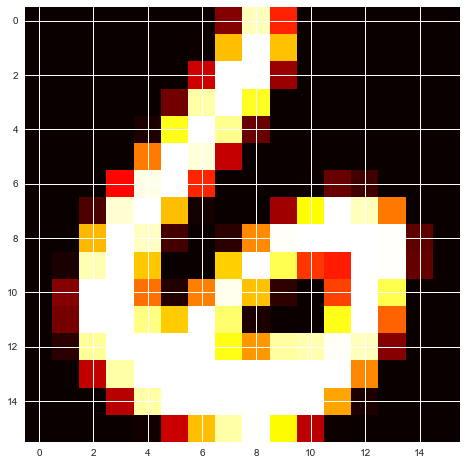

In [6]:
#Darstellung von image als Grafik:
plt.figure(figsize=(8,8))
plt.imshow(image_reshaped, cmap="hot", interpolation="none")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

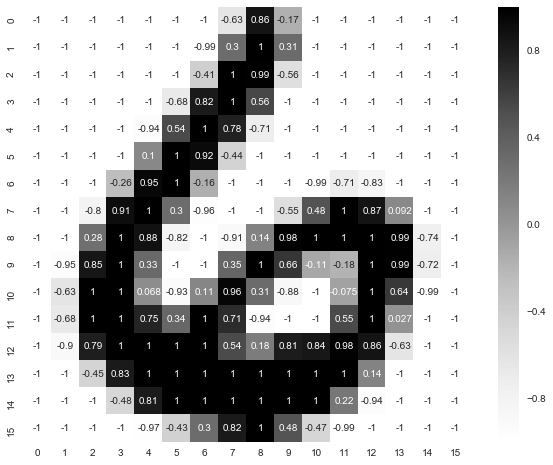

In [7]:
plt.figure(figsize=(10,8))
sns.heatmap(image3, annot=True, center=0, cmap='Greys', robust='True')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

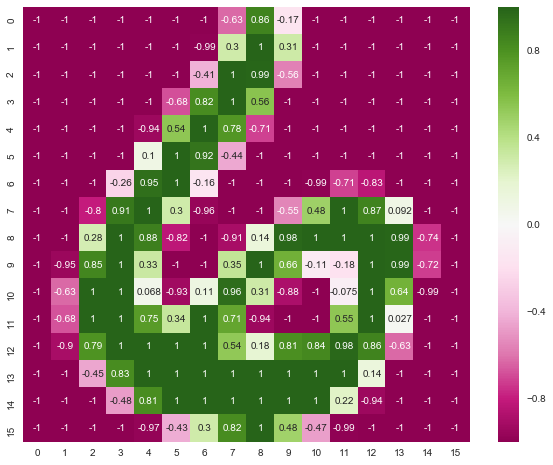

In [8]:
plt.figure(figsize=(10,8))
sns.heatmap(image3, annot=True, center=0, cmap='PiYG')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

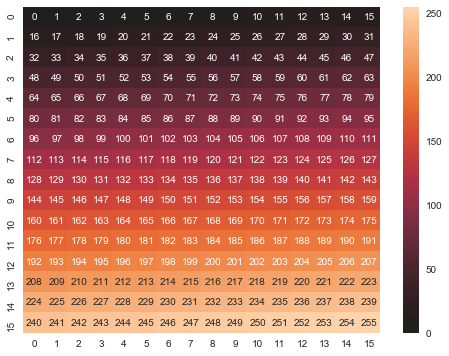

In [9]:
image4 = np.linspace(0,255,256, dtype=int).reshape(16,16)
plt.figure(figsize=(8,6))
sns.heatmap(image4, annot=True, center=0, fmt='d')
plt.show

Länge Cleaned Data: 7291
Länge Nummer 6: 664
Shape mean_image_6:  (256, 1)
Image.shape: (16, 16)


<function matplotlib.pyplot.show(*args, **kw)>

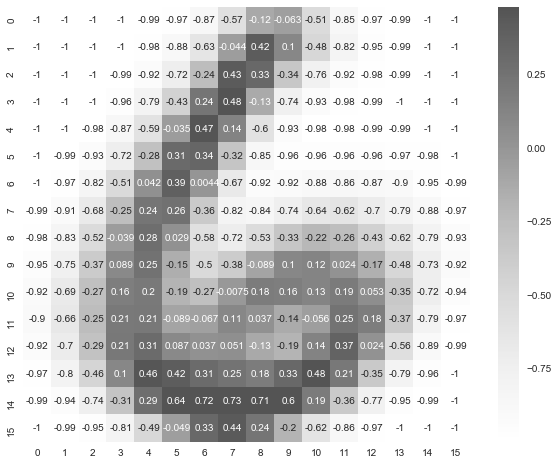

In [10]:
#Selektion aller Zeilen, die in der ersten Spalte den Wert 6 haben:
number_6 = pd.DataFrame(data[data[0] == 6])

#print(number_6)
print("Länge Cleaned Data:", len(data))
print("Länge Nummer 6:", len(number_6))

#Berechnung der Mittelwerte der Spalten über alle Zeilen bis zum vorletzten Wert
mean_image_6 = (pd.DataFrame(number_6.iloc[:,1:].mean()))
print("Shape mean_image_6: ", mean_image_6.shape)


# print(image)
image = mean_image_6.values.reshape((16,16))
print("Image.shape:", image.shape)
plt.figure(figsize=(10,8))
sns.heatmap(image, annot=True, center=0, cmap='Greys', robust='True')
plt.show

In [11]:
anzahl_cluster = 10
kmeans = KMeans(n_clusters=anzahl_cluster,random_state=0, ).fit(data.iloc[:,1:257])
data['KMcluster_nr'] = kmeans.predict(data.iloc[:,1:257])

In [75]:
results=[]
summen=[]
summen_zeilen = []
summen_spalten =[]
for i in range(0,10):
    for j in range(0,10):
        results.append(len(data[(data[0]==i) & (data['KMcluster_nr']==j)]))
    summe = (sum((results[-10:])))
    summen.append(summe)
results = pd.DataFrame(np.array(results).reshape(10,10))
for i in range(0,10):
    summe1 = sum(results.iloc[i,:])
    summen_zeilen.append(summe)

for j in range(0,10):
    summe2 = sum(results.iloc[:,j])
    summen_spalten.append(summe2)


results['Summe'] = summen
results.loc['Total'] = results.iloc[:,0:11].sum()
results



,0,1,2,3,4,5,6,7,8,9,Summe
0,115,11,0,0,15,524,6,0,516,7,1194
1,0,0,1001,0,0,0,0,1,0,3,1005
2,7,47,3,13,34,3,556,9,12,47,731
3,2,8,1,2,545,2,13,11,1,73,658
4,6,445,41,5,0,0,12,137,1,5,652
5,109,42,0,3,295,14,10,5,7,71,556
6,533,14,9,0,0,43,34,1,28,2,664
7,0,23,3,445,0,0,2,168,0,4,645
8,3,10,11,2,30,2,10,36,4,434,542
9,0,125,5,61,2,0,0,444,0,7,644


In [71]:
from sklearn.mixture import GaussianMixture
matrix = np.zeros(len(data)*256).reshape(len(data),256)
for i in range(1,256): 
    matrix[:,i] = data.iloc[:,i].values
                  
gmm = GaussianMixture(n_components=anzahl_cluster, n_init = 5, verbose = 1, random_state=0).fit(matrix)
data['GMM_cluster_nr'] = labels = gmm.predict(matrix)

Initialization 0
  Iteration 0
  Iteration 10
  Iteration 20
Initialization converged: True
Initialization 1
  Iteration 0
  Iteration 10
  Iteration 20
  Iteration 30
  Iteration 40
Initialization converged: True
Initialization 2
  Iteration 0
  Iteration 10
Initialization converged: True
Initialization 3
  Iteration 0
  Iteration 10
  Iteration 20
Initialization converged: True
Initialization 4
  Iteration 0
  Iteration 10
  Iteration 20
  Iteration 30
Initialization converged: True


In [72]:
# Häufigkeit der wahren Ziffern im Datensatz
for i in range(0,10):
    print(i,':',len(data[data[0] == i]))

0 : 1194
1 : 1005
2 : 731
3 : 658
4 : 652
5 : 556
6 : 664
7 : 645
8 : 542
9 : 644


In [73]:
# größe der Cluster im Datensatz
for i in range(0,10):
    print(i,':',len(data[data.loc[:,'GMM_cluster_nr'] == i]))


0 : 741
1 : 2040
2 : 1042
3 : 486
4 : 260
5 : 600
6 : 322
7 : 1171
8 : 364
9 : 265


In [76]:
results=[]
summen=[]
summen_zeilen = []
summen_spalten =[]
for i in range(0,10):
    for j in range(0,10):
        results.append(len(data[(data[0]==i) & (data['GMM_cluster_nr']==j)]))
    summe = (sum((results[-10:])))
    summen.append(summe)
results = pd.DataFrame(np.array(results).reshape(10,10))
for i in range(0,10):
    summe1 = sum(results.iloc[i,:])
    summen_zeilen.append(summe)

for j in range(0,10):
    summe2 = sum(results.iloc[:,j])
    summen_spalten.append(summe2)


results['Summe'] = summen
results.loc['Total'] = results.iloc[:,0:11].sum()
results


,0,1,2,3,4,5,6,7,8,9,Summe
0,636,523,1,0,3,15,16,0,0,0,1194
1,0,3,1001,0,0,0,0,1,0,0,1005
2,6,81,2,461,16,23,124,1,11,6,731
3,2,287,0,11,25,316,10,4,2,1,658
4,3,126,13,0,2,0,92,245,7,164,652
5,20,214,0,2,49,211,42,4,2,12,556
6,70,546,11,8,0,9,20,0,0,0,664
7,0,3,0,2,2,0,5,306,315,12,645
8,4,236,11,2,161,24,10,88,0,6,542
9,0,21,3,0,2,2,3,522,27,64,644


In [18]:
# means_init : array-like, shape (n_components, n_features), optional
real_means = []
for i in range(0,10):
    c = data[data[0] == i]
    for j in range (1,257):
        real_means.append(sum(c.iloc[:,j])/(len(c)))
real_means = np.array(real_means).reshape(10,256)
real_means

array([[-0.99862814, -0.99539782, -0.98492295, ..., -0.99652513,
        -0.99993635, -1.        ],
       [-1.        , -1.        , -1.        , ..., -0.99953234,
        -1.        , -1.        ],
       [-0.99248837, -0.96039124, -0.90257592, ..., -0.72318468,
        -0.82524213, -0.94885226],
       ...,
       [-0.97491628, -0.87981705, -0.76394574, ..., -1.        ,
        -1.        , -1.        ],
       [-0.99850185, -0.98442989, -0.93916052, ..., -0.99528782,
        -0.99999631, -1.        ],
       [-0.99989907, -0.99855745, -0.99561646, ..., -0.9966646 ,
        -0.99893944, -1.        ]])

In [19]:
data[data[0] == 0].describe()

,0,1,2,3,4,5,6,7,8,9,...,247,248,249,250,251,252,253,254,255,256
count,1194.0,1194.000000,1194.000000,1194.000000,1194.000000,1194.000000,1194.000000,1194.000000,1194.000000,1194.000000,...,1194.000000,1194.000000,1194.000000,1194.000000,1194.000000,1194.000000,1194.000000,1194.000000,1194.000000,1194.0
mean,0.0,-0.998628,-0.995398,-0.984923,-0.941251,-0.833343,-0.571423,-0.131585,0.152608,0.046284,...,0.283028,0.528025,0.439052,0.042488,-0.467014,-0.825506,-0.967511,-0.996525,-0.999936,-1.0
std,0.0,0.047404,0.081315,0.140025,0.250906,0.424874,0.610267,0.729472,0.733930,0.750372,...,0.662609,0.637355,0.648753,0.668787,0.583573,0.360953,0.157918,0.042178,0.002060,0.0
min,0.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.0
25%,0.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.938500,-0.567000,-0.780750,...,-0.152000,0.299000,0.171500,-0.544250,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.0
50%,0.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.957000,-0.161500,0.334000,0.161500,...,0.449500,0.828500,0.677000,0.109000,-0.679000,-1.000000,-1.000000,-1.000000,-1.000000,-1.0
75%,0.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.259500,0.550000,0.824750,0.763500,...,0.876500,1.000000,1.000000,0.587500,-0.063250,-0.841000,-1.000000,-1.000000,-1.000000,-1.0
max,0.0,0.638000,0.737000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.233000,-0.929000,-1.0


In [79]:

        
from sklearn.mixture import GaussianMixture
matrix = np.zeros(len(data)*256).reshape(len(data),256)
for i in range(1,256): 
    matrix[:,i] = data.iloc[:,i].values
                  
gmm = GaussianMixture(n_components=anzahl_cluster, n_init = 5, verbose = 1, means_init = real_means,  random_state=0).fit(matrix)
data['GMM_cluster_nr_with_means'] = labels = gmm.predict(matrix)

Initialization 0
  Iteration 0
  Iteration 10
  Iteration 20
  Iteration 30
Initialization converged: True
Initialization 1
  Iteration 0
  Iteration 10
  Iteration 20
  Iteration 30
Initialization converged: True
Initialization 2
  Iteration 0
  Iteration 10
  Iteration 20
  Iteration 30
  Iteration 40
Initialization converged: True
Initialization 3
  Iteration 0
  Iteration 10
  Iteration 20
  Iteration 30
  Iteration 40
Initialization converged: True
Initialization 4
  Iteration 0
Initialization converged: True


In [65]:
results=[]
summen=[]
summen_zeilen = []
summen_spalten =[]
for i in range(0,10):
    for j in range(0,10):
        results.append(len(data[(data[0]==i) & (data['GMM_cluster_nr_with_means']==j)]))
    summe = (sum((results[-10:])))
    summen.append(summe)
results = pd.DataFrame(np.array(results).reshape(10,10))
for i in range(0,10):
    summe1 = sum(results.iloc[i,:])
    summen_zeilen.append(summe)

for j in range(0,10):
    summe2 = sum(results.iloc[:,j])
    summen_spalten.append(summe2)


results['Summe'] = summen
results.loc['Total'] = results.iloc[:,0:11].sum()
results


,0,1,2,3,4,5,6,7,8,9,Summe
0,0,0,0,0,0,0,0,0,413,781,1194
1,0,0,0,0,0,0,0,0,1003,2,1005
2,0,0,0,0,0,0,0,0,123,608,731
3,0,0,0,0,0,0,0,0,341,317,658
4,0,13,0,0,0,0,0,0,364,275,652
5,0,35,0,0,0,0,0,0,168,353,556
6,0,3,0,0,0,0,0,0,449,212,664
7,0,3,0,0,0,0,0,0,380,262,645
8,0,3,0,0,0,0,0,0,437,102,542
9,0,1,0,0,0,0,0,0,541,102,644


In [82]:
anzahl_cluster = 10
kmeans = KMeans(n_clusters=anzahl_cluster,random_state=0, init=real_means, n_init=1).fit(data.iloc[:,1:257])
data['KMcluster_nr_real_means'] = kmeans.predict(data.iloc[:,1:257])

In [102]:
results=[]
summen=[]
summen_zeilen = []
summen_spalten =[]
for i in range(0,10):
    for j in range(0,10):
        results.append(len(data[(data[0]==i) & (data['KMcluster_nr_real_means']==j)]))
    summe = (sum((results[-10:])))
    summen.append(summe)
results = pd.DataFrame(np.array(results).reshape(10,10))
for i in range(0,10):
    summe1 = sum(results.iloc[i,:])
    summen_zeilen.append(summe)

for j in range(0,10):
    summe2 = sum(results.iloc[:,j])
    summen_spalten.append(summe2)


results['Summe'] = summen
results.loc['Total'] = results.iloc[:,0:11].sum()
results

,0,1,2,3,4,5,6,7,8,9,Summe
0,750,0,3,10,13,13,398,0,7,0,1194
1,0,1000,0,0,0,1,0,0,3,1,1005
2,8,4,542,45,63,0,8,13,40,8,731
3,2,2,16,548,6,27,2,2,45,8,658
4,0,39,9,0,463,0,5,5,5,126,652
5,10,1,9,15,32,421,30,4,28,6,556
6,58,17,25,0,16,25,511,0,12,0,664
7,0,3,2,0,21,1,0,443,4,171,645
8,4,10,6,35,15,10,1,2,431,28,542
9,0,7,0,2,115,0,0,67,7,446,644


In [94]:
data

,0,1,2,3,4,5,6,7,8,9,...,251,252,253,254,255,256,KMcluster_nr,GMM_cluster_nr,GMM_cluster_nr_with_means,KMcluster_nr_real_means
0,6.0,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-0.631,0.862,...,-0.474,-0.991,-1.000,-1.000,-1.000,-1.0,0,1,6,6
1,5.0,-1.000,-1.000,-1.000,-0.813,-0.671,-0.809,-0.887,-0.671,-0.853,...,0.762,0.126,-0.095,-0.671,-0.828,-1.0,4,5,6,5
2,4.0,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,...,1.000,-0.179,-1.000,-1.000,-1.000,-1.0,1,1,9,4
3,7.0,-1.000,-1.000,-1.000,-1.000,-1.000,-0.273,0.684,0.960,0.450,...,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0,3,7,9,9
4,3.0,-1.000,-1.000,-1.000,-1.000,-1.000,-0.928,-0.204,0.751,0.466,...,0.791,0.439,-0.199,-0.883,-1.000,-1.0,4,5,6,3
5,6.0,-1.000,-1.000,-1.000,-1.000,-1.000,-0.397,0.983,-0.535,-1.000,...,-0.437,-1.000,-1.000,-1.000,-1.000,-1.0,1,1,9,6
6,3.0,-1.000,-1.000,-1.000,-0.830,0.442,1.000,1.000,0.479,-0.328,...,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0,4,1,9,3
7,1.0,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,0.510,-0.213,...,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0,2,2,1,1
8,0.0,-1.000,-1.000,-1.000,-1.000,-1.000,-0.454,0.879,-0.745,-1.000,...,-0.174,-0.811,-1.000,-1.000,-1.000,-1.0,5,0,6,0
9,1.0,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-0.909,0.801,...,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0,2,2,1,1


## ???

In [109]:
len(data[(data[0] == 1) & (data[260 == 8])])

1005

In [93]:
data[0] == data.iloc[260]

ValueError: Can only compare identically-labeled Series objects

# Notizen:

In [66]:
real_means.shape

(10, 256)

In [69]:
# means_init : array-like, shape (n_components, n_features), optional
real_means = []
for i in range(0,10):
    c = data[data[0] == i]
    for j in range (1,257):
        real_means.append(sum(c.iloc[:,j])/(len(c)))
real_means2 = pd.DataFrame(np.array(real_means).reshape(10,256))

In [70]:
real_means2

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
0,-0.998628,-0.995398,-0.984923,-0.941251,-0.833343,-0.571423,-0.131585,0.152608,0.046284,-0.353701,...,0.283028,0.528025,0.439052,0.042488,-0.467014,-0.825506,-0.967511,-0.996525,-0.999936,-1.000000
1,-1.000000,-1.000000,-1.000000,-1.000000,-0.999996,-0.987278,-0.635156,0.477248,-0.000297,-0.881669,...,-0.838979,0.150824,0.509270,-0.567522,-0.960094,-0.996263,-0.999337,-0.999532,-1.000000,-1.000000
2,-0.992488,-0.960391,-0.902576,-0.799346,-0.603462,-0.373672,-0.195773,-0.152778,-0.320365,-0.624383,...,-0.552854,-0.681235,-0.781535,-0.836428,-0.842494,-0.795569,-0.718192,-0.723185,-0.825242,-0.948852
3,-0.997515,-0.980442,-0.912538,-0.730590,-0.419023,-0.103135,0.159503,0.338296,0.346710,0.127670,...,0.349298,0.411213,0.302494,0.041719,-0.294737,-0.608787,-0.821020,-0.933365,-0.985812,-0.999822
4,-1.000000,-0.999086,-0.991456,-0.958089,-0.879319,-0.784402,-0.817144,-0.845865,-0.827502,-0.739293,...,-0.763633,-0.516819,-0.346865,-0.435334,-0.673342,-0.857403,-0.942275,-0.985347,-0.995462,-0.999474
5,-0.999459,-0.995099,-0.971671,-0.933806,-0.882126,-0.802403,-0.706063,-0.532728,-0.367802,-0.208058,...,0.113392,0.283272,0.287005,0.135662,-0.180800,-0.511856,-0.778504,-0.923410,-0.981669,-0.998282
6,-1.000000,-1.000000,-1.000000,-0.999090,-0.992752,-0.966196,-0.868203,-0.571102,-0.122383,-0.062833,...,0.326991,0.444535,0.236607,-0.195976,-0.619059,-0.857779,-0.968842,-0.995492,-0.999998,-1.000000
7,-0.974916,-0.879817,-0.763946,-0.603887,-0.417952,-0.296960,-0.237640,-0.204478,-0.142487,-0.085837,...,-0.353008,0.071310,-0.253135,-0.807352,-0.976025,-0.995406,-0.999184,-1.000000,-1.000000,-1.000000
8,-0.998502,-0.984430,-0.939161,-0.829727,-0.600395,-0.258779,0.100122,0.268923,0.213755,-0.062351,...,0.106795,0.582238,0.565945,0.078574,-0.537823,-0.856784,-0.970821,-0.995288,-0.999996,-1.000000
9,-0.999899,-0.998557,-0.995616,-0.981531,-0.938734,-0.781503,-0.397306,0.165489,0.572399,0.519623,...,-0.590899,-0.019348,-0.075812,-0.574323,-0.873076,-0.963016,-0.990314,-0.996665,-0.998939,-1.000000


In [63]:
# means_init : array-like, shape (n_components, n_features), optional
real_means = []
for i in range(0,10):
    c = data[data[0] == i]
    for j in range (1,257):
        real_means.append(sum(c.iloc[:,j])/(len(c)))
real_means = np.array(real_means).reshape(10,256)
real_means

array([[-0.99862814, -0.99539782, -0.98492295, ..., -0.99652513,
        -0.99993635, -1.        ],
       [-1.        , -1.        , -1.        , ..., -0.99953234,
        -1.        , -1.        ],
       [-0.99248837, -0.96039124, -0.90257592, ..., -0.72318468,
        -0.82524213, -0.94885226],
       ...,
       [-0.97491628, -0.87981705, -0.76394574, ..., -1.        ,
        -1.        , -1.        ],
       [-0.99850185, -0.98442989, -0.93916052, ..., -0.99528782,
        -0.99999631, -1.        ],
       [-0.99989907, -0.99855745, -0.99561646, ..., -0.9966646 ,
        -0.99893944, -1.        ]])

In [20]:
GMM: Größe der Cluster:
0 : 593
1 : 1197
2 : 398
3 : 1055
4 : 568
5 : 1549
6 : 504
7 : 647
8 : 408
9 : 372
    zum Vergleich: die Werte aus dem ersten durchlauf
0 : 1731
1 : 1075
2 : 328
3 : 491
4 : 659
5 : 288
6 : 453
7 : 1212
8 : 475
9 : 579


SyntaxError: invalid syntax (<ipython-input-20-b4bf63d67288>, line 1)

In [ ]:
percentage_df = data.groupby(['digit', 'cluster_nr']).agg({'result': 'sum'})
percentage_df2 = result_df.groupby(['digit']).agg({'result': 'sum'})
percentage_df.div(percentage_df2, level='digit') * 100

In [23]:
#code-beispiel:
resultate=[0,1,2]
b=2
print(resultate)
resultate.append(b)
np.array(resultate).reshape(2,2)


[0, 1, 2]


array([[0, 1],
       [2, 2]])

In [ ]:
#Vergleich der Näherungsmethoden:
    
image_reshaped = mean_image_6.values.reshape((16,16))
plt.imshow(image_reshaped, cmap="hot", )
plt.show()

image_reshaped = mean_image_6.values.reshape((16,16))
plt.imshow(image_reshaped, cmap="hot", interpolation='sinc')
plt.show()

In [ ]:
mean_image_6 = pd.DataFrame(number_6.iloc[:,1:].mean())

plt.plot(mean_image_6)


In [ ]:
mean_image_6 = mean_image_6.iloc[1:,:]
mean_image_6
mpl.plot(mean_image_6)

In [ ]:
#image = image.iloc[1:,:]
mpl.plot(image)

In [ ]:
for x in range

In [ ]:
x = np.array([data[0]], dtype=np.float64)
shape = np.shape(data)
print(shape)
print("Size of the array: ", data.size)
print("Length of one array element in bytes: ", x.itemsize)
print("Total bytes consumed by the elements of the array: ", x.nbytes)

In [ ]:
image_inverted = image.inverted.values.reshape(16,16)
image_inverted.shape
plt.imshow(image_inverted, cmap="hot", interpolation='none')
plt.show()

In [ ]:
data[25]

In [ ]:
x = list(range(3,10,2))
print(x)

In [ ]:
images = data.iloc[:,1:] # select all rows, columns 1 to end

fig=plt.figure(figsize=(15, 15))
columns = 5
rows = 2
for i in range(0, columns*rows):
    digit_rows = images[data[0] == float(i)]
    mean_digit_rows = digit_rows.mean()
    img = mean_digit_rows.values.reshape(16,16)+1
    img = img**0.5
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(img,cmap="gray",interpolation="nearest",vmin=0,vmax=1)
    plt.colorbar(fraction=0.046, pad=0.04)
    plt.tight_layout()
plt.show()